<a href="https://colab.research.google.com/github/JohnNun/pneumonia_identification_project/blob/main/pneumonia_identification_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pneumonia Identification Project

# Business and Data Understanding


# Data preparation

In [53]:
# For Google Colab only
!pip install keras
!pip install keras_preprocessing
!pip install tensorflow
!pip install scikeras[tensorflow]

  Using cached numpy-1.18.5-cp38-cp38-win_amd64.whl (12.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\Users\\jonny\\AppData\\Local\\Temp\\pip-uninstall-cpd5_uoc\\core\\_multiarray_tests.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for jax: filename=jax-0.4.13-py3-none-any.whl size=1518827 sha256=561956e2875d1bf54392f714977e597fcaadddf87dc336bf9bd93a00910aee47
  Stored in directory: c:\users\jonny\appdata\local\pip\cache\wheels\46\d9\15\d2800d4089dc4c77299ac7513c6aa1036f5491edbd2bf6ba16
Successfully built jax
  Attempting uninstall: joblib
    Found existing installation: joblib 0.17.0
    Uninstalling joblib-0.17.0:
      Successfully uninstalled joblib-0.17.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\Users\\jonny\\anaconda3\\envs\\learn-env2\\Lib\\site-packages\\~klearn\\metrics\\cluster\\_expected_mutual_info_fast.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [1]:
from tensorflow import keras
from keras_preprocessing.image import ImageDataGenerator
from keras_preprocessing.image import array_to_img, img_to_array, load_img
from sklearn.model_selection import train_test_split
import numpy as np
import os

In [3]:
# Following code taken from stackoverflow user fdsig
import json
import os
from pathlib import Path

# your api key
api_key = {
'username':"" ,
'key':""}

# uses pathlib Path
kaggle_path = Path('/root/.kaggle')
os.makedirs(kaggle_path, exist_ok=True)

# opens file and dumps python dict to json object
with open (kaggle_path/'kaggle.json', 'w') as handl:
    json.dump(api_key,handl)

os.chmod(kaggle_path/'kaggle.json', 600)

In [4]:
# Downloading and Importing images
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia
!unzip chest-xray-pneumonia

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating:

In [2]:
# Linking directory path
train_data_dir = 'data/chest_xray/train'
val_data_dir = 'data/chest_xray/val'

In [312]:
# Getting train and validation data from directory
val_generator = ImageDataGenerator().flow_from_directory(val_data_dir,
                                                         target_size=(64, 64),
                                                         batch_size=232,
                                                         class_mode='categorical',
                                                         seed=42)

train_generator = ImageDataGenerator().flow_from_directory(train_data_dir,
                                                           target_size=(64, 64),
                                                           batch_size=2500,
                                                           class_mode='categorical',
                                                           seed=42)

Found 232 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [313]:
# Creating datasets, May take time to run.
train_images, train_labels = next(train_generator)
val_images, val_labels = next(val_generator)

In [56]:
# Test
val_generator_test = data_gen.flow_from_directory(val_data_dir, target_size=(64, 64), batch_size=16, class_mode='categorical', seed=42)
train_generator_test = data_gen.flow_from_directory(train_data_dir, target_size=(64, 64), batch_size=1304, class_mode='categorical', seed=42)

Found 16 images belonging to 2 classes.
Found 5216 images belonging to 2 classes.


In [314]:
print(np.shape(train_images))
print(np.shape(train_labels))
print(np.shape(val_images))
print(np.shape(val_labels))

(2500, 64, 64, 3)
(2500, 2)
(232, 64, 64, 3)
(232, 2)


In [315]:
# Reshaping data
train_img_unrow = train_images.reshape(2500, -1)
val_img_unrow = val_images.reshape(232, -1)

In [316]:
print(np.shape(train_img_unrow))
print(np.shape(val_img_unrow))

(2500, 12288)
(232, 12288)


In [317]:
# Normalizing data
train_img_final = train_img_unrow/255.0
val_img_final = val_img_unrow/255.0

In [318]:
train_img_final[50]

array([0.03921569, 0.03921569, 0.03921569, ..., 0.02745098, 0.02745098,
       0.02745098], dtype=float32)

In [34]:
# Scaling data
train_scaled_data = (train_img_unrow/255.0) * 2 - 1
val_scaled_data = (val_img_unrow/255.0) * 2 - 1

# Modeling

In [11]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import seaborn as sns

import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [12]:
# Function to quickly plot model results
def plot_results(model_results):
    """
    This function will take in the results of a model and plot the loss and accuracy of the model.

    Args:
    model_results (list): the results of the model in [] brackets.
    """
    for results in model_results:
        train_loss = results.history['loss']
        train_acc = results.history['accuracy']
        val_loss = results.history['val_loss']
        val_acc = results.history['val_accuracy']

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
        sns.lineplot(x=results.epoch, y=train_loss, ax=ax1, label='train_loss')
        sns.lineplot(x=results.epoch, y=train_acc, ax=ax2, label='train_accuracy')

        sns.lineplot(x=results.epoch, y=val_loss, ax=ax1, label='val_loss')
        sns.lineplot(x=results.epoch, y=val_acc, ax=ax2, label='val_accuracy')
        ax1.set_title('Loss')
        ax2.set_title('Accuracy')
        ax1.legend();

In [319]:
model_1 = Sequential()

In [320]:
model_1.add(layers.Input(shape=(12288,)))
model_1.add(Dense(50, activation='relu'))
model_1.add(Dense(25, activation='relu'))
model_1.add(Dense(10, activation='relu'))
model_1.add(Dense(2, activation='softmax'))

In [321]:
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [322]:
model_1_results = model_1.fit(train_img_final, train_labels,
                              epochs=10,
                              batch_size=125, 
                              validation_data=(val_img_final, val_labels))

Epoch 1/10
20/20 [==============================] - 0s 6ms/step - loss: 0.7098 - accuracy: 0.6956 - val_loss: 0.4705 - val_accuracy: 0.8448
Epoch 2/10
20/20 [==============================] - 0s 3ms/step - loss: 0.3188 - accuracy: 0.8744 - val_loss: 0.4679 - val_accuracy: 0.7716
Epoch 3/10
20/20 [==============================] - 0s 4ms/step - loss: 0.2550 - accuracy: 0.9036 - val_loss: 0.5772 - val_accuracy: 0.7155
Epoch 4/10
20/20 [==============================] - 0s 4ms/step - loss: 0.2329 - accuracy: 0.9052 - val_loss: 0.5057 - val_accuracy: 0.7629
Epoch 5/10
20/20 [==============================] - 0s 3ms/step - loss: 0.2029 - accuracy: 0.9172 - val_loss: 0.5377 - val_accuracy: 0.7500
Epoch 6/10
20/20 [==============================] - 0s 3ms/step - loss: 0.2052 - accuracy: 0.9200 - val_loss: 0.3684 - val_accuracy: 0.8276
Epoch 7/10
20/20 [==============================] - 0s 3ms/step - loss: 0.1584 - accuracy: 0.9420 - val_loss: 0.3134 - val_accuracy: 0.8664
Epoch 8/10
20/20 [==

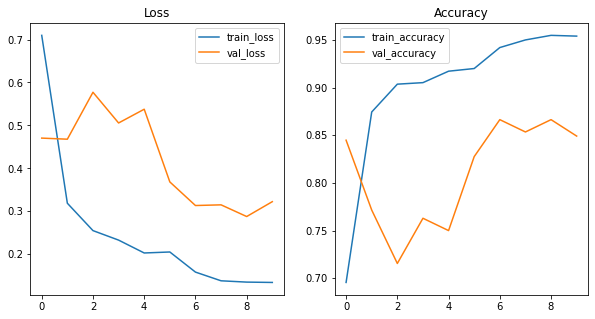

In [323]:
plot_results([model_1_results])

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.2, patience=3, min_lr=5e-6)

In [324]:
model_2 = Sequential()

In [325]:
model_2.add(layers.Input(shape=(12288,)))
model_2.add(Dense(50, activation='relu'))
model_2.add(Dense(25, activation='relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(10, activation='relu'))
model_2.add(Dropout(0.2))
model_2.add(Dense(2, activation='softmax'))

In [326]:
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [327]:
model_2_results = model_2.fit(train_img_final, train_labels,
                              epochs=50,
                              batch_size=300, 
                              validation_data=(val_img_final, val_labels))

Epoch 1/50
9/9 [==============================] - 0s 12ms/step - loss: 1.0310 - accuracy: 0.5268 - val_loss: 0.7012 - val_accuracy: 0.5000
Epoch 2/50
9/9 [==============================] - 0s 5ms/step - loss: 0.7117 - accuracy: 0.5604 - val_loss: 0.6564 - val_accuracy: 0.5733
Epoch 3/50
9/9 [==============================] - 0s 5ms/step - loss: 0.6190 - accuracy: 0.6452 - val_loss: 0.6534 - val_accuracy: 0.5000
Epoch 4/50
9/9 [==============================] - 0s 5ms/step - loss: 0.5828 - accuracy: 0.6780 - val_loss: 0.6529 - val_accuracy: 0.5000
Epoch 5/50
9/9 [==============================] - 0s 5ms/step - loss: 0.5373 - accuracy: 0.7040 - val_loss: 0.5664 - val_accuracy: 0.7112
Epoch 6/50
9/9 [==============================] - 0s 5ms/step - loss: 0.4827 - accuracy: 0.7388 - val_loss: 0.4982 - val_accuracy: 0.7716
Epoch 7/50
9/9 [==============================] - 0s 5ms/step - loss: 0.4282 - accuracy: 0.8000 - val_loss: 0.4875 - val_accuracy: 0.7457
Epoch 8/50
9/9 [=================

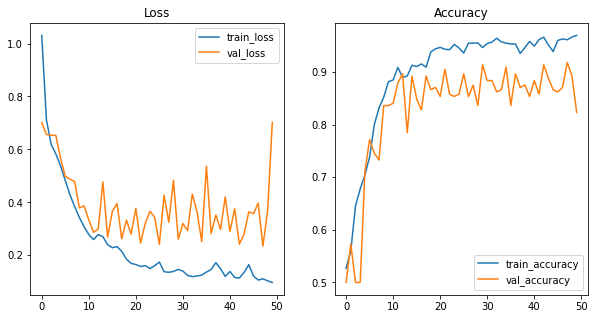

In [328]:
plot_results([model_2_results])

In [329]:
model_3 = Sequential()

In [330]:
model_3.add(layers.Input(shape=(12288,)))
model_3.add(Dense(50, activation='relu'))
model_3.add(Dense(50, activation='relu', kernel_regularizer=l2(l2=0.5)))
model_3.add(Dropout(0.5))
model_3.add(Dense(25, activation='relu'))
model_3.add(Dense(25, activation='relu', kernel_regularizer=l2(l2=0.25)))
model_3.add(Dropout(0.2))
model_3.add(Dense(10, activation='relu'))
model_3.add(Dense(2, activation='softmax'))

In [331]:
model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [332]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [333]:
model_3_results = model_3.fit(train_img_final, train_labels,
                              epochs=40, 
                              batch_size=350,
                              validation_data=(val_img_final, val_labels),
                              callbacks=[early_stop])

Epoch 1/40
8/8 [==============================] - 0s 15ms/step - loss: 31.3075 - accuracy: 0.7388 - val_loss: 29.5309 - val_accuracy: 0.5000
Epoch 2/40
8/8 [==============================] - 0s 7ms/step - loss: 28.3732 - accuracy: 0.7352 - val_loss: 26.9090 - val_accuracy: 0.5000
Epoch 3/40
8/8 [==============================] - 0s 7ms/step - loss: 25.8321 - accuracy: 0.7408 - val_loss: 24.5117 - val_accuracy: 0.5000
Epoch 4/40
8/8 [==============================] - 0s 7ms/step - loss: 23.4831 - accuracy: 0.7460 - val_loss: 22.2870 - val_accuracy: 0.5000
Epoch 5/40
8/8 [==============================] - 0s 8ms/step - loss: 21.3194 - accuracy: 0.7436 - val_loss: 20.2486 - val_accuracy: 0.5000
Epoch 6/40
8/8 [==============================] - 0s 7ms/step - loss: 19.3468 - accuracy: 0.7444 - val_loss: 18.3968 - val_accuracy: 0.5000
Epoch 7/40
8/8 [==============================] - 0s 7ms/step - loss: 17.5405 - accuracy: 0.7440 - val_loss: 16.7210 - val_accuracy: 0.5000
Epoch 8/40
8/8 [===

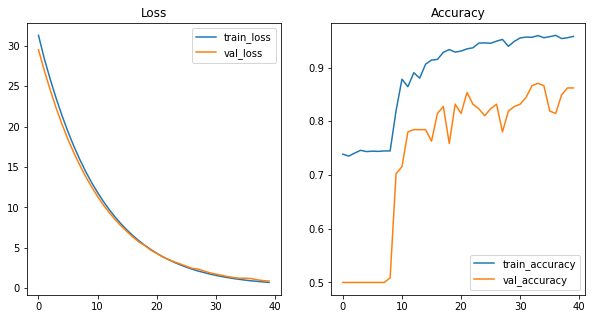

In [334]:
plot_results([model_3_results])

In [335]:
model_4 = Sequential()

In [336]:
model_4.add(layers.Input(shape=(12288,)))
model_4.add(Dense(75, activation='relu'))
model_4.add(Dense(50, activation='relu'))
model_4.add(Dropout(0.5))
model_4.add(Dense(50, activation='relu', kernel_regularizer=l2(l2=0.5)))
model_4.add(Dense(25, activation='relu'))
model_4.add(Dropout(0.25))
model_4.add(Dense(25, activation='relu', kernel_regularizer=l2(l2=0.25)))
model_4.add(Dense(10, activation='relu', kernel_regularizer=l2(l2=0.01)))
model_4.add(Dense(2, activation='softmax'))

In [337]:
model_4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [338]:
model_4_results = model_4.fit(train_img_final, train_labels,
                              epochs=50,
                              batch_size=250,
                              validation_data=(val_img_final, val_labels),
                              callbacks=[early_stop])

Epoch 1/50
10/10 [==============================] - 0s 14ms/step - loss: 29.2380 - accuracy: 0.7436 - val_loss: 27.5093 - val_accuracy: 0.5000
Epoch 2/50
10/10 [==============================] - 0s 7ms/step - loss: 25.9675 - accuracy: 0.7408 - val_loss: 24.4204 - val_accuracy: 0.5000
Epoch 3/50
10/10 [==============================] - 0s 6ms/step - loss: 23.0040 - accuracy: 0.7444 - val_loss: 21.6428 - val_accuracy: 0.5000
Epoch 4/50
10/10 [==============================] - 0s 6ms/step - loss: 20.3354 - accuracy: 0.7436 - val_loss: 19.1329 - val_accuracy: 0.5000
Epoch 5/50
10/10 [==============================] - 0s 7ms/step - loss: 17.9542 - accuracy: 0.7448 - val_loss: 16.9327 - val_accuracy: 0.5000
Epoch 6/50
10/10 [==============================] - 0s 6ms/step - loss: 15.8435 - accuracy: 0.7452 - val_loss: 14.9455 - val_accuracy: 0.5000
Epoch 7/50
10/10 [==============================] - 0s 6ms/step - loss: 13.9654 - accuracy: 0.7504 - val_loss: 13.2964 - val_accuracy: 0.5000
Epoch

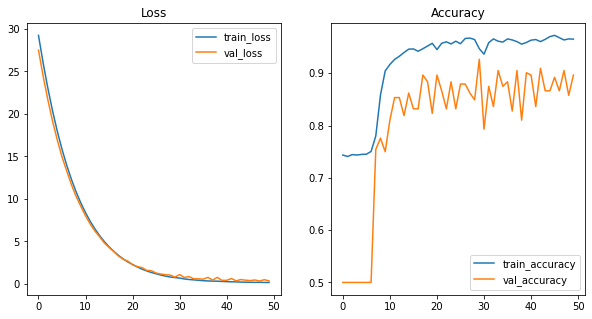

In [339]:
plot_results([model_4_results])

In [362]:
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.2, patience=3, min_lr=1e-5)

In [363]:
model_5 = models.Sequential()

In [364]:
model_5.add(layers.Conv2D(16, (5, 5), activation='relu', input_shape=(64, 64, 3)))
model_5.add(layers.BatchNormalization())
model_5.add(layers.MaxPooling2D())

model_5.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model_5.add(layers.BatchNormalization())
model_5.add(layers.Dropout(0.5))
model_5.add(layers.MaxPooling2D())

model_5.add(layers.Conv2D(64, (3, 3), activation='relu', padding='valid'))
#model_5.add(layers.BatchNormalization())
model_5.add(layers.MaxPooling2D())

model_5.add(layers.Conv2D(128, (3, 3), activation='relu', padding='valid'))
#model_5.add(layers.BatchNormalization())
model_5.add(layers.Dropout(0.1))
model_5.add(layers.MaxPooling2D())

model_5.add(layers.Flatten())
model_5.add(layers.Dense(2, activation='softmax'))

In [365]:
model_5.compile(Adam(learning_rate=0.00025), loss='categorical_crossentropy', metrics=['accuracy'])

In [366]:
model_5_results = model_5.fit(train_images, train_labels,
                              epochs=13,
                              batch_size=320,
                              validation_data=(val_images, val_labels),
                              callbacks=[early_stop, reduce_lr])

Epoch 1/13
8/8 [==============================] - 2s 279ms/step - loss: 0.6894 - accuracy: 0.7080 - val_loss: 1.6857 - val_accuracy: 0.5000
Epoch 2/13
8/8 [==============================] - 2s 269ms/step - loss: 0.3850 - accuracy: 0.8588 - val_loss: 0.5686 - val_accuracy: 0.6595
Epoch 3/13
8/8 [==============================] - 2s 273ms/step - loss: 0.2739 - accuracy: 0.8948 - val_loss: 0.5641 - val_accuracy: 0.7198
Epoch 4/13
8/8 [==============================] - 2s 272ms/step - loss: 0.2042 - accuracy: 0.9244 - val_loss: 0.4242 - val_accuracy: 0.8017
Epoch 5/13
8/8 [==============================] - 2s 273ms/step - loss: 0.1800 - accuracy: 0.9348 - val_loss: 0.2903 - val_accuracy: 0.8621
Epoch 6/13
8/8 [==============================] - 2s 267ms/step - loss: 0.1457 - accuracy: 0.9452 - val_loss: 0.2753 - val_accuracy: 0.8621
Epoch 7/13
8/8 [==============================] - 2s 271ms/step - loss: 0.1434 - accuracy: 0.9432 - val_loss: 0.2776 - val_accuracy: 0.8707
Epoch 8/13
8/8 [====

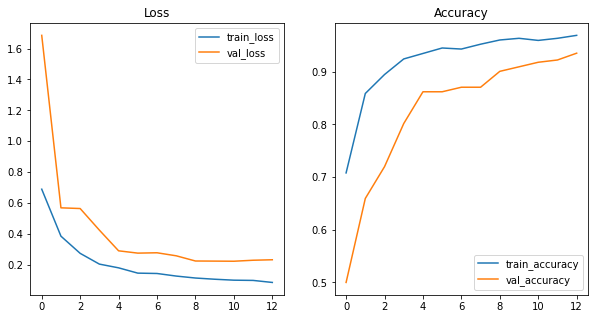

In [367]:
plot_results([model_5_results])

# Evaluation